In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Low demand

In [5]:
# Define logistic sigmoid function
def sigmoid(z):

    g = 1 / (1 + np.exp(-z))
    
    return g

In [6]:
# Import data
data_demand = pd.read_csv('../data/raw/economics/Cone color_vs_Expected Revenue.csv', encoding='utf-8')
data_high_demand = data_demand[['Color', 'High demand']].to_numpy()
data_moderate_demand = data_demand[['Color', 'Moderate demand']].to_numpy()
data_low_demand = data_demand[['Color', 'Low demand']].to_numpy()


# Logistic regressions

# Select data
X, y = data_low_demand[:, 0], data_low_demand[:, 1]

m = X.shape[0]
n = 1

X = X.reshape(m, n)

# Add ones to X for the intercept term
X = np.concatenate([np.ones((m, 1)), X], axis=1)


# Define cost function
def costFunction(theta):

    h = sigmoid(X.dot(theta.T))
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return J

def gradient(theta):
    
    h = sigmoid(X.dot(theta.T))
    grad = -(1 / m) * (y - h).dot(X)
    
    return grad

# Adam optimizer
def adam(theta, alpha, num_iters, b_1=0.9, b_2=0.999, eps=1e-8, tolerance=1e-16):

    # Make a copy of theta, to avoid changing the original array, since numpy arrays are passed by reference to functions
    theta = theta.copy()
    
    # Use a python list to save cost in every iteration
    J_history = []
    
    m = np.zeros(theta.shape)
    v = np.zeros(theta.shape)
    
    for i in range(num_iters):
        
        # Gradient
        g = gradient(theta)

        # First moment
        m = b_1 * m + (1 - b_1) * g

        # Second moment
        v = b_2 * v + (1 - b_2) * g**2

        # Bias correction for the first and second moments

        mhat = m / (1 - b_1**(i+1))

        vhat = v / (1 - b_2**(i+1))
        
        change = alpha * mhat / (np.sqrt(vhat) + eps)
        
        # Update parameter theta
        theta = theta - change
        
        # save the cost J in every iteration
        J_history.append(costFunction(theta))
        # report progress
        print('#', i , 'cost: ', costFunction(theta), 'MaxGrad: ', np.max(np.abs(gradient(theta))))
        
        if np.max(np.abs(gradient(theta))) <= tolerance:
            break
        
    return theta, J_history

# initialize fitting parameters

theta = np.random.randn(n + 1)
# Gradient descent settings
iterations = 1000000
alpha = 0.0005 # learning rate

theta, J_history = adam(theta, alpha, iterations)

plt.plot(list(range(1, len(J_history)+1)), J_history)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

#checkpoint = np.array([theta, J_history], dtype=object)
#np.save('../reports/checkpoint_low_demand.npy', checkpoint)

# 0 cost:  1.7286985347291186 MaxGrad:  2.8743559917091095
# 1 cost:  1.7271608362372157 MaxGrad:  2.8730225471779955
# 2 cost:  1.7256239871773447 MaxGrad:  2.871685834590373
# 3 cost:  1.7240880035122783 MaxGrad:  2.870345860081981
# 4 cost:  1.7225529011285152 MaxGrad:  2.869002629860033
# 5 cost:  1.7210186958065254 MaxGrad:  2.8676561501722246
# 6 cost:  1.7194854031919484 MaxGrad:  2.8663064272761796
# 7 cost:  1.717953038767929 MaxGrad:  2.864953467409555
# 8 cost:  1.7164216178288083 MaxGrad:  2.8635972767610345
# 9 cost:  1.7148911554553146 MaxGrad:  2.86223786144241
# 10 cost:  1.713361666491422 MaxGrad:  2.860875227461939
# 11 cost:  1.7118331655229881 MaxGrad:  2.859509380699147
# 12 cost:  1.7103056668582832 MaxGrad:  2.8581403268812147
# 13 cost:  1.7087791845104814 MaxGrad:  2.8567680715610693
# 14 cost:  1.7072537321821661 MaxGrad:  2.8553926200972777
# 15 cost:  1.7057293232518795 MaxGrad:  2.8540139776358124
# 16 cost:  1.7042059707627175 MaxGrad:  2.8526321490937434


KeyboardInterrupt: 

## Moderate demand

In [ ]:
# Select data
X, y = data_moderate_demand[:, 0], data_moderate_demand[:, 1]

m = X.shape[0]
n = 1

X = X.reshape(m, n)

# Add ones to X for the intercept term
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Define cost function
def costFunction(theta):

    h = sigmoid(X.dot(theta.T))
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return J

def gradient(theta):
    
    h = sigmoid(X.dot(theta.T))
    grad = -(1 / m) * (y - h).dot(X)
    
    return grad

# initialize fitting parameters

theta = np.random.randn(n + 1)
# Gradient descent settings
iterations = 1000000
alpha = 0.0005 # learning rate

theta, J_history = adam(theta, alpha, iterations)

plt.plot(list(range(1, len(J_history)+1)), J_history)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

#checkpoint = np.array([theta, J_history], dtype=object)
#np.save('../reports/checkpoint_moderate_demand.npy', checkpoint)

## High demand

In [ ]:
# Select data
X, y = data_high_demand[:, 0], data_high_demand[:, 1]

m = X.shape[0]
n = 1

X = X.reshape(m, n)

# Add ones to X for the intercept term
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Define cost function
def costFunction(theta):

    h = sigmoid(X.dot(theta.T))
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return J

def gradient(theta):
    
    h = sigmoid(X.dot(theta.T))
    grad = -(1 / m) * (y - h).dot(X)
    
    return grad

# initialize fitting parameters

theta = np.random.randn(n + 1)
# Gradient descent settings
iterations = 1000000
alpha = 0.0005 # learning rate

theta, J_history = adam(theta, alpha, iterations)

plt.plot(list(range(1, len(J_history)+1)), J_history)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

#checkpoint = np.array([theta, J_history], dtype=object)
#np.save('../reports/checkpoint_high_demand.npy', checkpoint)

## Results

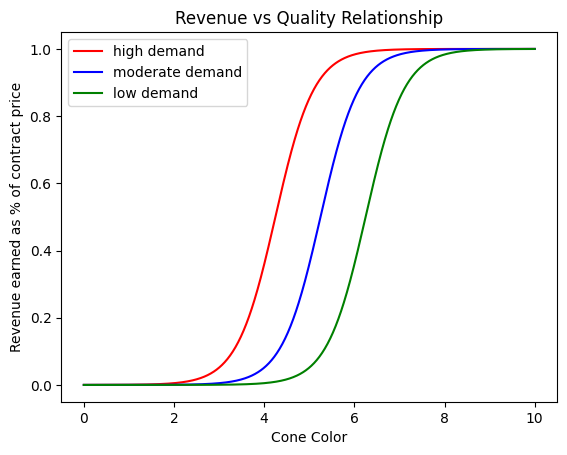

In [7]:
# Load parameters
checkpoint1 = np.load('../reports/checkpoint_high_demand.npy', allow_pickle=True)
theta_high = checkpoint1[0]

checkpoint2 = np.load('../reports/checkpoint_moderate_demand.npy', allow_pickle=True)
theta_moderate = checkpoint2[0]

checkpoint3 = np.load('../reports/checkpoint_low_demand.npy', allow_pickle=True)
theta_low = checkpoint3[0]

# Define logistic sigmoid function
def sigmoid(z):

    g = 1 / (1 + np.exp(-z))
    
    return g

# Plot
plt.figure(2)
x = np.linspace(0, 10, 1000)

plt.plot(x, sigmoid(theta_high[0] + theta_high[1] * x), color='r', label='high demand')
plt.plot(x, sigmoid(theta_moderate[0] + theta_moderate[1] * x), color='b', label='moderate demand')
plt.plot(x, sigmoid(theta_low[0] + theta_low[1] * x), color='g', label='low demand')

plt.ylabel("Revenue earned as % of contract price")
plt.xlabel("Cone Color")
plt.title("Revenue vs Quality Relationship")
plt.legend()
plt.show()